# **0. Table of contents**

In [521]:
from IPython.display import Markdown # type: ignore
import re
import nbformat # type: ignore
import os

def generate_markdown_toc(notebook_path=None):
    # If no path is provided, use current path (open notebook)
    if notebook_path is None:
        notebook_path = os.path.basename(__file__) if '__file__' in globals() else None
        if notebook_path is None:
            print("Unable to automatically determine notebook path. Please pass it in manually.")
            return
    # Read notebook contents
    with open(notebook_path, 'r', encoding='utf-8') as f:
        nb = nbformat.read(f, as_version=4)
    toc = "## Table of Contents\n\n"
    for cell in nb.cells:
        if cell.cell_type == 'markdown':
            for line in cell.source.splitlines():
                m = re.match(r'^(#+)\s+(.*)', line)
                if m:
                    level = len(m.group(1))
                    title = m.group(2).strip()
                    # Create anchor: remove special characters, lowercase, replace spaces = "-"
                    anchor = re.sub(r'[^a-zA-Z0-9 ]', '', title).lower().replace(' ', '-')
                    toc += f"{'  ' * (level - 1)}- [{title}](#{anchor})\n"
    return Markdown(toc)
generate_markdown_toc("my-spotify-activity-2025-08-11.ipynb")

## Table of Contents

- [**0. Table of contents**](#0-table-of-contents)
- [**I. Import Library**](#i-import-library)
- [**II. Prepared functions**](#ii-prepared-functions)
  - [**II.1. Function to FIX FONT ERRORS**](#ii1-function-to-fix-font-errors)
- [**III. MARQUEE**](#iii-marquee)
  - [**III.1. Import MY MARQUEE**](#iii1-import-my-marquee)
  - [**III.2. MY MARQUEE contributions**](#iii2-my-marquee-contributions)
- [**IV. MY OFFLINE PLAYLISTs**](#iv-my-offline-playlists)
  - [**IV.1. Import MY OFFLINE PLAYLISTs**](#iv1-import-my-offline-playlists)
  - [**IV.2. MY PLAYLISTs track contributions**](#iv2-my-playlists-track-contributions)
  - [**IV.3. MY OFFLINE PLAYLISTs track by month**](#iv3-my-offline-playlists-track-by-month)
- [**V. MY STREAMINGs**](#v-my-streamings)
  - [**IV.1. Import MY STREAMINGs**](#iv1-import-my-streamings)
  - [**IV.2. MY STREAMINGs Media Types contributions**](#iv2-my-streamings-media-types-contributions)
  - [**IV.3. TOP 20 MY STREAMINGs audio tracks**](#iv3-top-20-my-streamings-audio-tracks)
  - [**IV.4. TOP 20 MY STREAMINGs audio artists**](#iv4-top-20-my-streamings-audio-artists)
  - [**IV.5. TOP 20 MY STREAMINGs audio albums**](#iv5-top-20-my-streamings-audio-albums)
  - [**IV.6. MY STREAMINGs by year**](#iv6-my-streamings-by-year)
  - [**IV.7. MY STREAMINGs by month**](#iv7-my-streamings-by-month)
  - [**IV.8. MY STREAMINGs Top Artist by month**](#iv8-my-streamings-top-artist-by-month)
  - [**IV.9. MY STREAMINGs Top Audio Track by month**](#iv9-my-streamings-top-audio-track-by-month)
  - [**IV.10. MY STREAMINGs Top Album by month**](#iv10-my-streamings-top-album-by-month)
  - [**IV.11. MY STREAMINGs by hour**](#iv11-my-streamings-by-hour)
  - [**IV.12. MY STREAMINGs over time**](#iv12-my-streamings-over-time)
- [**THE END**](#the-end)


---
# **I. Import Library**

In [2]:
import pandas as pd # type: ignore
from datetime import datetime
import matplotlib.pyplot as plt # type: ignore
import matplotlib.patches as mpatches  # type: ignore
import matplotlib.cm as cm # type: ignore
import seaborn as sns # type: ignore
import numpy as np  # type: ignore
import os
import json
from zoneinfo import ZoneInfo

> ##### *For display

In [3]:
pd.options.display.max_rows = 20
pd.options.display.min_rows = 20

---
# **II. Prepared functions**

## **II.1. Function to FIX FONT ERRORS**

In [4]:
def fix_encoding_error(text):
    try:
        return text.encode("latin1").decode("utf-8")
    except:
        return text

---
# **III. MARQUEE**

## **III.1. Import MY MARQUEE**

In [9]:
marquee_df = pd.read_json("/Users/tainguyen/Desktop/Python/Spotify Account Data/Marquee.json")
marquee_df = marquee_df.drop_duplicates()
print("Describe Marquee:",marquee_df.describe())
marquee_df

Describe Marquee:        artistName                      segment
count         411                          411
unique        410                            4
top       Mustard  Previously Active Listeners
freq            2                          331


,artistName,segment
0,Binz,Previously Active Listeners
1,Polo G,Moderate listeners
2,Anh Tú Atus,Previously Active Listeners
3,50 Cent,Previously Active Listeners
4,Hà Lê,Previously Active Listeners
5,B-Wine,Previously Active Listeners
6,Kemi not a Kid,Previously Active Listeners
7,Brownstone,Previously Active Listeners
8,Crank D,Moderate listeners
9,Sleepy Hallow,Previously Active Listeners


## **III.2. MY MARQUEE contributions**

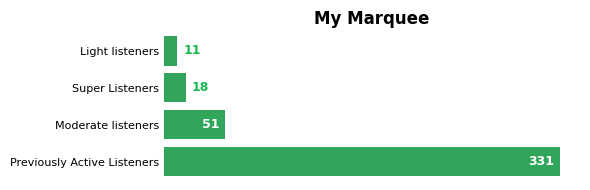

In [522]:
marquee_agg = (
    marquee_df
    .groupby("segment")
    .agg(count_artist=("artistName", "nunique"))
    .sort_values("count_artist")
    .reset_index()
)
plt.figure(figsize=(6,2))
ax = sns.barplot(
    data=marquee_agg,
    y="segment",
    x=marquee_agg["count_artist"],
    dodge=False,
    # palette=colors
    color="#1db954"
)
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis='y', labelsize=8, length=0)
ax.tick_params(axis='x', bottom=False, labelbottom=False)
ax.grid(False)
for i, value in enumerate(marquee_agg["count_artist"]):
    if value > 20:
        ax.text(value-5, i, value, va="center", fontsize=9, ha="right", color="white", fontweight = "bold")
    else:
        ax.text(value+5, i, value, va="center", fontsize=9, ha="left", color="#1db954", fontweight = "bold")

plt.title("My Marquee", fontweight="bold")
sns.despine(bottom = True, left = True)
plt.tight_layout()
plt.savefig("III.2. MY MARQUEE contributions.png")
plt.show()

---
# **IV. MY OFFLINE PLAYLISTs**

## **IV.1. Import MY OFFLINE PLAYLISTs**

In [151]:
with open("/Users/tainguyen/Desktop/Python/Spotify Account Data/Playlist1.json", "r") as f:
    offline_playlist_raw_data = json.load(f)
offline_playlist_records = []
for item in offline_playlist_raw_data['playlists']:
     playlist = item.get('name','')
     playlist_last_modified = item.get('lastModifiedDate','')
     items = item.get('items',[])
     for entry in items:
          track = entry.get('track',{})
          track_added_date = entry.get('addedDate','')
          track_name = track.get('trackName','')
          artist = track.get('artistName','')
          album = track.get('albumName','')
          track_id = track.get('trackUri','')
          offline_playlist_records.append({
               'name' : playlist,
               'last_modified': playlist_last_modified,
               'track_name' : track_name,
               'artist': artist,
               'album': album,
               'track_id': track_id,
               'track_added_date': track_added_date
          })
offline_playlist_df = pd.DataFrame(offline_playlist_records)
offline_playlist_df = offline_playlist_df.drop_duplicates()
print("Describe My Offline Playlists:\n",offline_playlist_df.describe(include="object"))

offline_playlist_df

Describe My Offline Playlists:
               name last_modified track_name       artist   album  \
count           83            83         83           83      83   
unique           5             5         82           37      46   
top     Es aey dee    2025-07-25   Sprinter  Post Malone  AUSTIN   
freq            21            21          2           17      17   

                                    track_id track_added_date  
count                                     83               83  
unique                                    82               23  
top     spotify:track:2FDTHlrBguDzQkp7PVj16Q       2023-08-12  
freq                                       2               17  


,name,last_modified,track_name,artist,album,track_id,track_added_date
0,My top tracks playlist,2025-08-04,act ii: date @ 8 (feat. Drake) - remix,4batz,act ii: date @ 8 (feat. Drake) [remix],spotify:track:3QS9ZCtoSCJhmaJ7QNXSAS,2025-08-04
1,My top tracks playlist,2025-08-04,one day,Nevi,one day,spotify:track:5Zlz9mzW6eAynvfmym10X6,2025-08-04
2,My top tracks playlist,2025-08-04,I Don't Know,Trevor Daniel,Homesick,spotify:track:14x8VRIwozZe1heTIHQFQ9,2025-08-04
3,My top tracks playlist,2025-08-04,Sprinter,Dave,Sprinter,spotify:track:2FDTHlrBguDzQkp7PVj16Q,2025-08-04
4,My top tracks playlist,2025-08-04,Cafein Freestyle,24k.Right,Nội Dung Nhạy Cảm - Part 2,spotify:track:1WC7ARd8kbqtSeYJbINbE4,2025-08-04
5,Post Malone – AUSTIN,2023-11-03,Don't Understand,Post Malone,AUSTIN,spotify:track:4MTuL20LF3pWebeJbcNh7p,2023-08-12
6,Post Malone – AUSTIN,2023-11-03,Something Real,Post Malone,AUSTIN,spotify:track:444vevlQjTnKioLLncteGv,2023-08-12
7,Post Malone – AUSTIN,2023-11-03,Chemical,Post Malone,AUSTIN,spotify:track:7jvtmQ3onpWeUm7dyFSSSc,2023-08-12
8,Post Malone – AUSTIN,2023-11-03,Novacandy,Post Malone,AUSTIN,spotify:track:6V1TqJxtw3P0ouCKICvl9l,2023-08-12
9,Post Malone – AUSTIN,2023-11-03,Mourning,Post Malone,AUSTIN,spotify:track:3pI3nzi2Y0Iyj1nATDOeQV,2023-08-12


## **IV.2. MY PLAYLISTs track contributions**

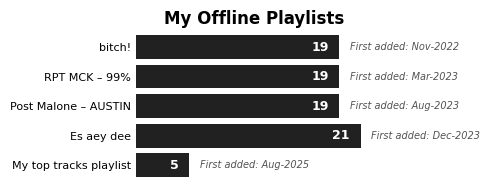

In [523]:
offline_playlist_df['track_added_date'] = pd.to_datetime(offline_playlist_df['track_added_date'], errors='coerce')
offline_playlist_agg = (
    offline_playlist_df
    .groupby("name")
    .agg(count_track=("track_id", "nunique"), first_added_date=("track_added_date","min"))
    .sort_values("first_added_date")
    .reset_index()
)
offline_playlist_agg["first_added_date"] = "First added: " + offline_playlist_agg["first_added_date"].dt.strftime("%b-%Y")

plt.figure(figsize=(5,2))
ax = sns.barplot(
    data=offline_playlist_agg,
    y="name",
    x=offline_playlist_agg["count_track"],
    dodge=False,
    # palette=colors
    color="#212121"
)
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis='y', labelsize=8, length=0)
ax.tick_params(axis='x', bottom=False, labelbottom=False)
ax.grid(False)
for i, (value, first_added_date) in enumerate(zip(offline_playlist_agg["count_track"],offline_playlist_agg["first_added_date"])):
    ax.text(value-1, i, value, va="center", fontsize=9, ha="right", color="white", fontweight="bold")
    ax.text(value+1, i, first_added_date, va="center", fontsize=7, ha="left", color="#535353", fontstyle="italic")

plt.title("My Offline Playlists", fontweight="bold")
sns.despine(bottom = True, left = True)
plt.tight_layout()
plt.savefig("IV.2. MY PLAYLISTs track contributions.png")
plt.show()

## **IV.3. MY OFFLINE PLAYLISTs track by month**

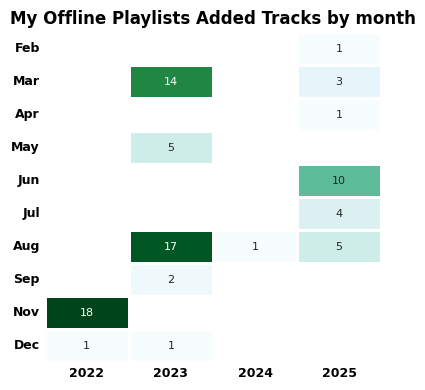

In [524]:
offline_playlist_df["year"] = offline_playlist_df["track_added_date"].dt.to_period("Y")
offline_playlist_df["month_number"] = offline_playlist_df["track_added_date"].dt.month
offline_playlist_df["month"] = offline_playlist_df["track_added_date"].dt.strftime("%b")
offline_playlist_month_pivot = offline_playlist_df.pivot_table(
    index="month_number",
    columns="year",
    values="track_id",
    aggfunc="nunique",
    fill_value=0
)
month_order = offline_playlist_df[["month_number","month"]].drop_duplicates().sort_values("month_number")["month"].values
offline_playlist_month_pivot.index = month_order
mask = offline_playlist_month_pivot == 0

plt.figure(figsize=(4,4))
sns.heatmap(offline_playlist_month_pivot, annot=True, fmt="d", cmap="BuGn", linewidths=1, cbar=False, mask=mask, annot_kws={"fontsize":8})
plt.title("My Offline Playlists Added Tracks by month", fontweight="bold")
plt.yticks(rotation=0, fontsize=9, fontweight="bold")
plt.xticks(fontsize = 9, fontweight="bold")
plt.xlabel("")
plt.tick_params(axis='y', length=0)
plt.tick_params(axis='x', length=0)
plt.tight_layout()
plt.savefig("IV.3. MY OFFLINE PLAYLISTs track by month.png")
plt.show()

---
# **V. MY STREAMINGs**

## **V.1. Import MY STREAMINGs**

In [507]:
base_path = "/Users/tainguyen/Desktop/Python/Spotify Extended Streaming History/"
streaming_records = []

for root, dirs, files in os.walk(base_path):
    for file_name in files:
        if file_name.startswith("Streaming_History_Audio") and file_name.endswith(".json"):
            default_media_type = "audio"
        elif file_name.startswith("Streaming_History_Video") and file_name.endswith(".json"):
            default_media_type = "video"
        else:
            continue
        file_path = os.path.join(root, file_name)
        try:
            with open(file_path, "r", encoding="utf-8") as f:
                streaming_raw_data = json.load(f)
            for item in streaming_raw_data:
                if item.get('episode_name') or item.get('spotify_episode_uri'):
                    media_type = "podcast"
                    track_name = item.get('episode_name', item.get('master_metadata_track_name', ''))
                    album = item.get('episode_show_name', item.get('master_metadata_album_album_name', ''))
                    artist = item.get('episode_show_name', item.get('master_metadata_album_artist_name', ''))
                    track_id = item.get('spotify_episode_uri', item.get('spotify_track_uri', ''))
                else:
                    media_type = default_media_type
                    track_name = item.get('master_metadata_track_name', '')
                    album = item.get('master_metadata_album_album_name', '')
                    track_id = item.get('spotify_track_uri', '')
                    artist = item.get('master_metadata_album_artist_name', '')
                streaming_records.append({
                    "datetime": item.get('ts', ''),
                    "media_type": media_type,
                    "track_name": track_name,
                    "artist": artist,
                    "album": album,
                    "track_id": track_id, 
                    "ms_played": item.get('ms_played', 0),
                })
        except Exception as e:
            print(f"Error reading {file_path}: {e}")

streaming_df = pd.DataFrame(streaming_records)
streaming_df["hour_played"] = streaming_df["ms_played"] / 3600000
streaming_df['datetime'] = pd.to_datetime(streaming_df['datetime'], errors='coerce')
streaming_df['datetime'] = streaming_df['datetime'].dt.tz_convert('Asia/Ho_Chi_Minh').dt.tz_localize(None)
streaming_df = streaming_df.drop_duplicates()
streaming_df = streaming_df.sort_values(by="datetime",ascending=False)
print("Describe My Streaming:\n",streaming_df.describe(include='object'))
streaming_df

Describe My Streaming:
        media_type                              track_name       artist  album  \
count       39533                                   39529        39529  39529   
unique          3                                    6106         2042   4519   
top         audio  act ii: date @ 8 (feat. Drake) - remix  Post Malone    99%   
freq        39031                                     118         1903   1064   

                                    track_id  
count                                  39529  
unique                                  6826  
top     spotify:track:3QS9ZCtoSCJhmaJ7QNXSAS  
freq                                     118  


,datetime,media_type,track_name,artist,album,track_id,ms_played,hour_played
39627,2025-08-04 06:58:04,audio,MUTT (feat. Freddie Gibbs) [Remix],Leon Thomas,MUTT,spotify:track:7qEVRQ63lrsY3TJHSpjRLw,257383,0.071495
39626,2025-08-04 06:53:46,audio,Electric Feel,MGMT,Oracular Spectacular,spotify:track:3FtYbEfBqAlGO46NUDQSAt,229640,0.063789
39625,2025-08-04 06:49:55,audio,undressed,sombr,undressed,spotify:track:4AajxCEwGEsmHmT4H1TwjY,182088,0.050580
39624,2025-08-04 06:46:53,audio,Ms. Jackson,Outkast,Stankonia,spotify:track:0I3q5fE6wg7LIfHGngUTnV,270506,0.075141
39623,2025-08-04 06:42:22,audio,Ladders,Mac Miller,Swimming,spotify:track:39NDBdU5Xkm5pCFGa5kZtI,287040,0.079733
39622,2025-08-04 06:37:34,audio,Young Dumb & Broke,Khalid,American Teen,spotify:track:5Z3GHaZ6ec9bsiI5BenrbY,202546,0.056263
39621,2025-08-04 06:34:11,audio,YES IT IS,Leon Thomas,MUTT,spotify:track:2iksjpqL3eraxCBKqNHuqd,228047,0.063346
39620,2025-08-04 06:30:22,audio,GO BABY,Justin Bieber,SWAG,spotify:track:01p5urrGw5fuFCcfT7PBgc,194760,0.054100
39619,2025-08-04 06:27:07,audio,back to friends,sombr,back to friends,spotify:track:0FTmksd2dxiE5e3rWyJXs6,199032,0.055287
39618,2025-08-04 06:23:47,audio,LVL,A$AP Rocky,LONG.LIVE.A$AP (Deluxe Version),spotify:track:787rCZF9i4L1cXGMkdyIk4,220133,0.061148


## **V.2. MY STREAMINGs Media Types contributions**

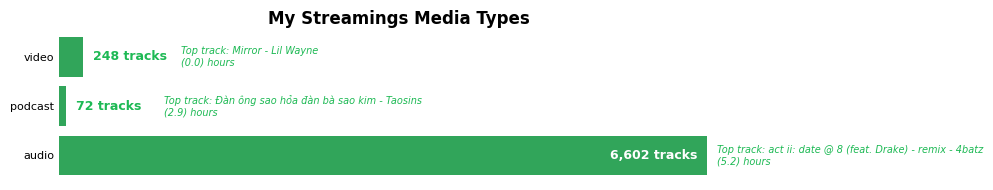

In [525]:
streaming_media_type_agg = (
    streaming_df
    .groupby("media_type")
    .agg(count_track=("track_id", "nunique"), sum_played=("hour_played","sum"))
    .sort_values("sum_played")
    .reset_index()
)
streaming_agg = (
    streaming_df
    .groupby(["media_type","track_name","track_id","artist"])
    .agg(sum_played=("hour_played","sum"))
    .sort_values("sum_played")
    .reset_index()
)
top_streaming_track = (
    streaming_agg
    .sort_values(["media_type", "sum_played"], ascending=[True, False])
    .drop_duplicates(["media_type"])
    .rename(columns={"track_name": "top_track", "artist": "top_artist", "sum_played": "top_track_played"})
)
streaming_media_type_agg = streaming_media_type_agg.merge(top_streaming_track, on="media_type", how="left")
streaming_media_type_agg["top_track"] = 'Top track: ' + streaming_media_type_agg["top_track"] + ' - ' + streaming_media_type_agg["top_artist"] + '\n(' + streaming_media_type_agg["top_track_played"].apply(lambda x: f"{x:,.1f}").astype(str) + ') hours'

plt.figure(figsize=(10,2))
ax = sns.barplot(
    data=streaming_media_type_agg,
    y="media_type",
    x=streaming_media_type_agg["count_track"],
    dodge=False,
    # palette=colors
    color="#1db954"
)
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis='y', labelsize=8, length=0)
ax.tick_params(axis='x', bottom=False, labelbottom=False)
ax.grid(False)
for i, (value, top_track) in enumerate(zip(streaming_media_type_agg["count_track"], streaming_media_type_agg["top_track"])):
    if value > 1000:
        ax.text(value-100, i, f"{value:,.0f}" + " tracks", va="center", fontsize=9, ha="right", color="white", fontweight = "bold")
        ax.text(value+100, i, top_track, va="center", fontsize=7, ha="left", color="#1db954", fontstyle="italic" )
    else:
        ax.text(value+100, i, f"{value:,.0f}" + " tracks", va="center", fontsize=9, ha="left", color="#1db954", fontweight = "bold")
        ax.text(value+1000, i, top_track, va="center", fontsize=7, ha="left", color="#1db954", fontstyle="italic" )

plt.title("My Streamings Media Types", fontweight="bold")
sns.despine(bottom = True, left = True)
plt.tight_layout()
plt.savefig("IV.2. MY STREAMINGs Media Types contributions.png")
plt.show()

## **V.3. TOP 20 MY STREAMINGs audio tracks**

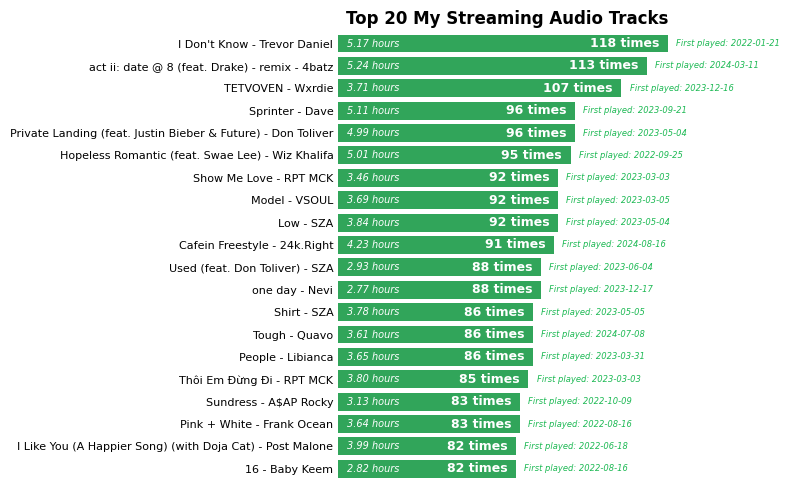

In [526]:
streaming_track_agg = (
    streaming_df[streaming_df["media_type"] == "audio"]
    .groupby(["track_name","track_id","artist"])
    .agg(count_track=("track_id", "count"), sum_played=("hour_played","sum"), first_played = ("datetime","min"))
    .sort_values(by="count_track",ascending=False)
    .reset_index()
)
streaming_track_agg["track_name"] = streaming_track_agg["track_name"] + ' - ' + streaming_track_agg["artist"]
streaming_track_agg["first_played"] = "First played: " + streaming_track_agg["first_played"].dt.to_period("D").astype(str)

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=streaming_track_agg.head(20),
    y="track_name",
    x=(streaming_track_agg["count_track"]).head(20),
    dodge=False,
    # palette="viridis"
    color="#1db954"
)
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis='y', labelsize=8, length=0)
ax.tick_params(axis='x', bottom=False, labelbottom=False)
ax.grid(False)
for i, (value, first_played, sum_played) in enumerate(zip(streaming_track_agg["count_track"].head(20), streaming_track_agg["first_played"].head(20), streaming_track_agg["sum_played"].head(20))):
     ax.text(value-2, i, f"{value:,.0f}" + " times", va="center", fontsize=9, ha="right", color="white", fontweight = "bold")
     ax.text(value+2, i, first_played, va="center", ha="left", fontsize=6, color="#1db954", fontstyle= 'italic')
     ax.text(42, i, f"{sum_played:,.2f}" + " hours", va="center", ha="left", fontsize=7, color="white", fontstyle= 'italic')
plt.title("Top 20 My Streaming Audio Tracks", fontweight="bold")
sns.despine(bottom = True, left = True)
plt.xlim(40,120)
plt.tight_layout()
plt.savefig("IV.3. TOP 20 MY STREAMINGs audio tracks.png")
plt.show()

## **V.4. TOP 20 MY STREAMINGs audio artists**

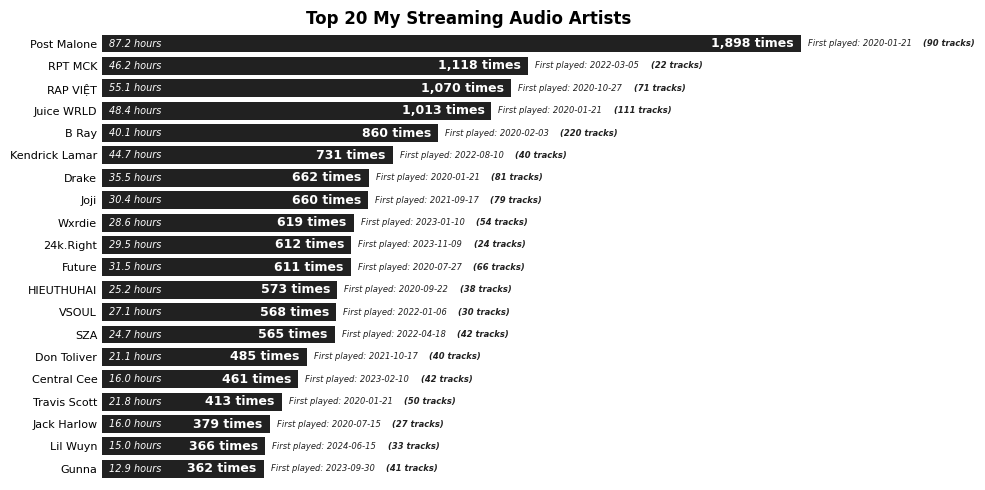

In [527]:
streaming_audio_artist_agg = (
    streaming_df[streaming_df["media_type"] == "audio"]
    .groupby("artist")
    .agg(count_times=("track_id", "count"), sum_played=("hour_played","sum"), first_played = ("datetime","min"), count_track = ("track_id","nunique"))
    .sort_values(by="count_times",ascending=False)
    .reset_index()
)
streaming_audio_artist_agg["first_played"] = "First played: " + streaming_audio_artist_agg["first_played"].dt.to_period("D").astype(str)

plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=streaming_audio_artist_agg.head(20),
    y="artist",
    x=(streaming_audio_artist_agg["count_times"]).head(20)+100,
    dodge=False,
    # palette="crest_r"
    color="#212121"
)
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis='y', labelsize=8, length=0)
ax.tick_params(axis='x', bottom=False, labelbottom=False)
ax.grid(False)
for i, (value, first_played, sum_played, count_track) in enumerate(zip(streaming_audio_artist_agg["count_times"].head(20), streaming_audio_artist_agg["first_played"].head(20), streaming_audio_artist_agg["sum_played"].head(20), streaming_audio_artist_agg["count_track"].head(20))):
     ax.text(value+100-20, i, f"{value:,.0f}" + " times", va="center", fontsize=9, ha="right", color="white", fontweight = "bold")
     ax.text(value+100+20, i, first_played, va="center", ha="left", fontsize=6, color="#212121", fontstyle= 'italic')
     ax.text(value+100+350, i, "(" + f"{count_track:,.0f}" + " tracks)", va="center", ha="left", fontsize=6, color="#212121", fontstyle= 'italic', fontweight = "bold")
     ax.text(20, i, f"{sum_played:,.1f}" + " hours", va="center", ha="left", fontsize=7, color="white", fontstyle= 'italic')
plt.title("Top 20 My Streaming Audio Artists", fontweight="bold")
sns.despine(bottom = True, left = True)
# plt.xlim(40,120)
plt.tight_layout()
plt.savefig("IV.4. TOP 20 MY STREAMINGs audio artists.png")
plt.show()

## **V.5. TOP 20 MY STREAMINGs audio albums**

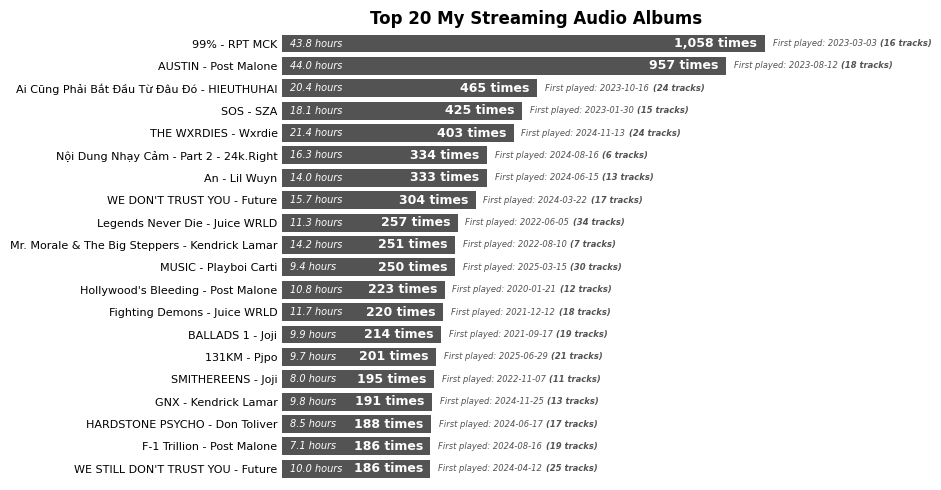

In [528]:
streaming_audio_album_agg = (
    streaming_df[streaming_df["media_type"] == "audio"]
    .groupby(["artist","album"])
    .agg(count_times=("track_id", "count"), sum_played=("hour_played","sum"), first_played = ("datetime","min"), count_track = ("track_id","nunique"))
    .sort_values(by="count_times",ascending=False)
    .reset_index()
)
streaming_audio_album_agg["first_played"] = "First played: " + streaming_audio_album_agg["first_played"].dt.to_period("D").astype(str)
streaming_audio_album_agg["album"] = streaming_audio_album_agg["album"] + " - " + streaming_audio_album_agg["artist"]

plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=streaming_audio_album_agg.head(20),
    y="album",
    x=(streaming_audio_album_agg["count_times"]).head(20)+200,
    dodge=False,
    # palette="flare"
    color="#535353"
)
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis='y', labelsize=8, length=0)
ax.tick_params(axis='x', bottom=False, labelbottom=False)
ax.grid(False)
for i, (value, first_played, sum_played, count_track) in enumerate(zip(streaming_audio_album_agg["count_times"].head(20), streaming_audio_album_agg["first_played"].head(20), streaming_audio_album_agg["sum_played"].head(20), streaming_audio_album_agg["count_track"].head(20))):
     ax.text(value+200-20, i, f"{value:,.0f}" + " times", va="center", fontsize=9, ha="right", color="white", fontweight = "bold")
     ax.text(value+200+20, i, first_played, va="center", ha="left", fontsize=6, color="#535353", fontstyle= 'italic')
     ax.text(value+200+300, i, "(" + f"{count_track:,.0f}" + " tracks)", va="center", ha="left", fontsize=6, color="#535353", fontstyle= 'italic', fontweight = "bold")
     ax.text(20, i, f"{sum_played:,.1f}" + " hours", va="center", ha="left", fontsize=7, color="white", fontstyle= 'italic')
plt.title("Top 20 My Streaming Audio Albums", fontweight="bold")
sns.despine(bottom = True, left = True)
# plt.xlim(40,120)
plt.tight_layout()
plt.savefig("IV.5. TOP 20 MY STREAMINGs audio albums.png")
plt.show()

## **V.6. MY STREAMINGs by year**

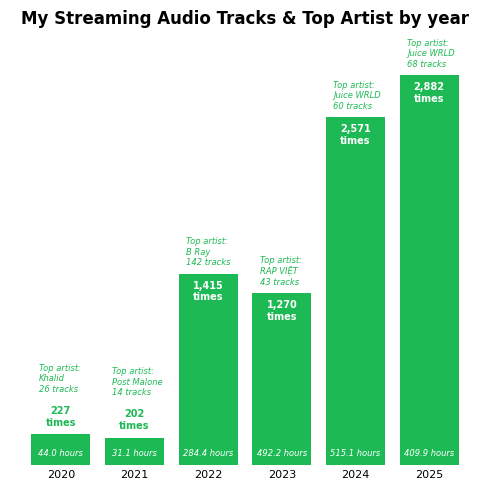

In [529]:
streaming_df["year"] = streaming_df["datetime"].dt.to_period("Y")
streaming_year_agg = (
    streaming_df
    .sort_values("datetime")
    .groupby("year")
    .agg(count_track=("track_id", "nunique"), sum_played=("hour_played","sum"))
    .reset_index()
)
streaming_artist_year_agg = (
    streaming_df
    .sort_values("datetime")
    .groupby(["year","artist"])
    .agg(count_track=("track_id", "nunique"))
    .reset_index()
)
top_artist_year = (
    streaming_artist_year_agg
    .sort_values(["year", "count_track"], ascending=[True, False])
    .drop_duplicates("year")
    .rename(columns={"artist": "top_artist","count_track":"top_artist_track"})
)
streaming_year_agg = streaming_year_agg.merge(top_artist_year, on="year", how="left")
streaming_year_agg["top_artist"] = "Top artist:\n" + streaming_year_agg["top_artist"] + "\n" + streaming_year_agg["top_artist_track"].astype(str) + " tracks"
streaming_year_agg["year"] = streaming_year_agg["year"].astype(str)

plt.figure(figsize=(5,5))
bars = plt.bar(streaming_year_agg["year"], streaming_year_agg["count_track"], color="#1db954")
for bar, top_artist, sum_played in zip(bars, streaming_year_agg["top_artist"], streaming_year_agg["sum_played"]):
    plt.text(bar.get_x() + bar.get_width()/2, 50, f"{sum_played:,.1f}" + " hours", ha='center', va='bottom', fontsize=6, fontstyle="italic", rotation=0, color="white")
    if bar.get_height() > 300:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()-50, f"{bar.get_height():,.0f}" + "\ntimes", ha='center', va='top', fontsize=7, fontweight="bold", color="white")
        plt.text(bar.get_x() + bar.get_width()/2-0.3, bar.get_height()+50, top_artist, ha='left', va='bottom', fontsize=6, fontstyle="italic", rotation=0, color="#1db954")
    else:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+50, f"{bar.get_height():,.0f}"  + "\ntimes", ha='center', va='bottom', fontsize=7, fontweight="bold", color="#1db954")
        plt.text(bar.get_x() + bar.get_width()/2-0.3, bar.get_height()+300, top_artist, ha='left', va='bottom', fontsize=6, fontstyle="italic", rotation=0, color="#1db954")

plt.xticks(fontsize=8)
plt.yticks([])
plt.tick_params(axis='y', length=0)
plt.tick_params(axis='x', length=0)
plt.ylim(0,3200)
plt.title("My Streaming Audio Tracks & Top Artist by year", fontweight="bold")
plt.tight_layout()
sns.despine(bottom = True, left = True)
plt.savefig("IV.6. MY STREAMINGs by year.png")
plt.show()

## **V.7. MY STREAMINGs by month**

/var/folders/7q/sfnchm8d521c9vslcz802kw80000gn/T/ipykernel_21314/2915975654.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = streaming_month_pivot_track.applymap(lambda x: f"{x:,.0f}" if x != 0 else "") + " times \n" + streaming_month_pivot_played.round(1).astype(str) + " hours"


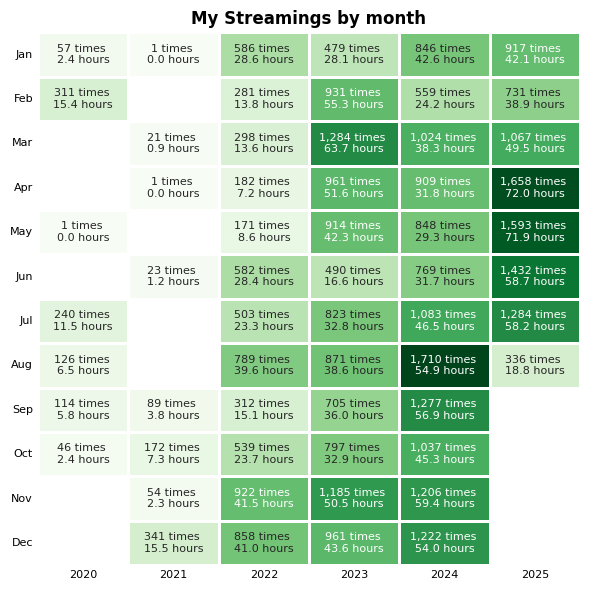

In [530]:
streaming_df["month_number"] = streaming_df["datetime"].dt.month
streaming_df["month"] = streaming_df["datetime"].dt.strftime("%b")
streaming_month_pivot_track = streaming_df.pivot_table(
    index="month_number",
    columns="year",
    values="track_id",
    aggfunc="count",
    fill_value=0
)
streaming_month_pivot_played = streaming_df.pivot_table(
    index="month_number",
    columns="year",
    values="hour_played",
    aggfunc="sum",
    fill_value=0
)

month_order = streaming_df[["month_number","month"]].drop_duplicates().sort_values("month_number")["month"].values
streaming_month_pivot_track.index = month_order
streaming_month_pivot_played.index = month_order
mask = streaming_month_pivot_track == 0

annot = streaming_month_pivot_track.applymap(lambda x: f"{x:,.0f}" if x != 0 else "") + " times \n" + streaming_month_pivot_played.round(1).astype(str) + " hours"


plt.figure(figsize=(6,6))
sns.heatmap(streaming_month_pivot_track, annot=annot, fmt="", cmap="Greens", linewidths=1, cbar=False, mask=mask, annot_kws={"fontsize":8})
plt.title("My Streamings by month", fontweight="bold")
plt.yticks(rotation=0, fontsize = 8)
plt.xticks(fontsize = 8)
plt.xlabel("")
plt.tick_params(axis='y', length=0)
plt.tick_params(axis='x', length=0)
plt.tight_layout()
plt.savefig("IV.7. MY STREAMINGs by month.png")
plt.show()

## **V.8. MY STREAMINGs Top Artist by month**

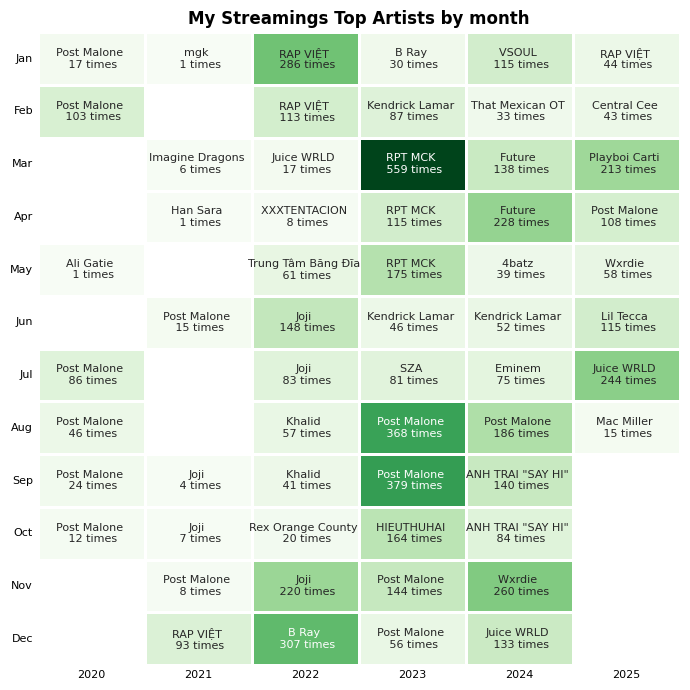

In [531]:
streaming_artist_month = (
    streaming_df
    .groupby(["year", "month_number", "artist"])
    .agg(count_track=("track_id", "count"))
    .reset_index()
)
streaming_top_artist_month = (
    streaming_artist_month
    .sort_values(["year", "month_number", "count_track"], ascending=[True, True, False])
    .drop_duplicates(subset=["year", "month_number"])
)
streaming_top_artist_month_pivot = streaming_top_artist_month.pivot(
    index="month_number",
    columns="year",
    values="artist"
)
streaming_top_artist_month_pivot_track = streaming_top_artist_month.pivot(
    index="month_number",
    columns="year",
    values="count_track"
)

def shorten_text(owner):
    if pd.isna(owner) or not isinstance(owner, str):
        return ""
    words = owner.strip().split()
    return " ".join(words[:4]) if len(words) > 4 else owner

annot = (streaming_top_artist_month_pivot.stack()
    .astype(str)
    .to_frame("artist")
    .assign(artist=lambda df: df["artist"].apply(shorten_text))
    .join(streaming_top_artist_month_pivot_track.stack().to_frame("count_track"))
    .apply(lambda row: f"{row['artist']} \n {row['count_track']:,.0f} times", axis=1)
    .unstack()
)

streaming_top_artist_month_pivot_track.index = month_order
annot.index = month_order

plt.figure(figsize=(7,7))
sns.heatmap(streaming_top_artist_month_pivot_track, annot=annot, fmt="", cmap="Greens", linewidths=1, cbar=False, mask=streaming_top_artist_month_pivot_track.isna(), annot_kws={"fontsize":8})
plt.title("My Streamings Top Artists by month", fontweight="bold")
plt.yticks(rotation=0, fontsize = 8)
plt.xticks(fontsize = 8)
plt.xlabel("")
plt.tick_params(axis='y', length=0)
plt.tick_params(axis='x', length=0)
plt.tight_layout()
plt.savefig("IV.8. MY STREAMINGs Top Artist by month.png")
plt.show()

## **V.9. MY STREAMINGs Top Audio Track by month**

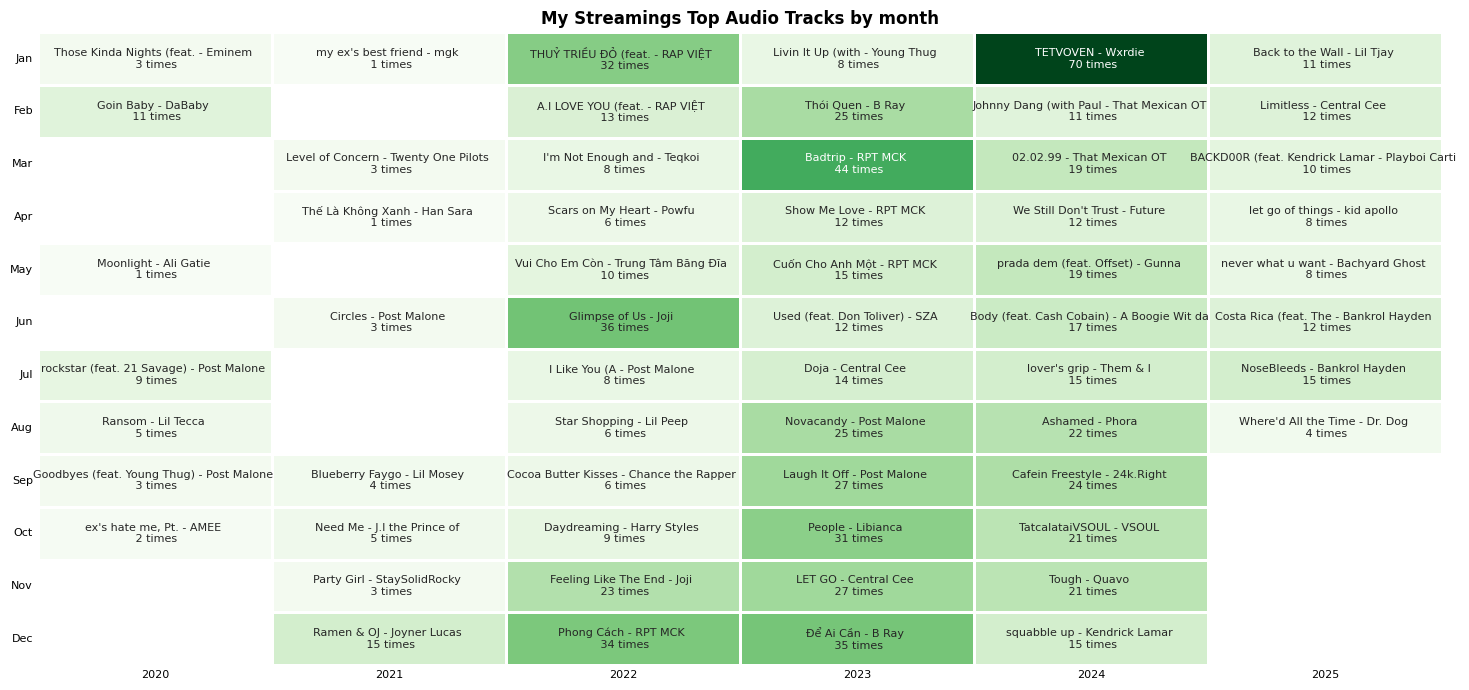

In [532]:
streaming_artist_month = (
    streaming_df
    .groupby(["year", "month_number", "track_id", "track_name", "artist"])
    .agg(count_track=("track_id", "count"))
    .reset_index()
)
streaming_artist_month["track_name"] = streaming_artist_month["track_name"].apply(shorten_text) + ' - ' + streaming_artist_month["artist"].apply(shorten_text)
streaming_top_artist_month = (
    streaming_artist_month
    .sort_values(["year", "month_number", "count_track"], ascending=[True, True, False])
    .drop_duplicates(subset=["year", "month_number"])
)
streaming_top_artist_month_pivot = streaming_top_artist_month.pivot(
    index="month_number",
    columns="year",
    values="track_name"
)
streaming_top_artist_month_pivot_track = streaming_top_artist_month.pivot(
    index="month_number",
    columns="year",
    values="count_track"
)

annot = (streaming_top_artist_month_pivot.stack()
    .astype(str)
    .to_frame("track")
    .join(streaming_top_artist_month_pivot_track.stack().to_frame("count_track"))
    .apply(lambda row: f"{row['track']} \n {row['count_track']:,.0f} times", axis=1)
    .unstack()
)

streaming_top_artist_month_pivot_track.index = month_order
annot.index = month_order

plt.figure(figsize=(15,7))
sns.heatmap(streaming_top_artist_month_pivot_track, annot=annot, fmt="", cmap="Greens", linewidths=1, cbar=False, mask=streaming_top_artist_month_pivot_track.isna(), annot_kws={"fontsize":8})
plt.title("My Streamings Top Audio Tracks by month", fontweight="bold")
plt.yticks(rotation=0, fontsize = 8)
plt.xticks(fontsize = 8)
plt.xlabel("")
plt.tick_params(axis='y', length=0)
plt.tick_params(axis='x', length=0)
plt.tight_layout()
plt.savefig("IV.9. MY STREAMINGs Top Audio Track by month.png")
plt.show()

## **V.10. MY STREAMINGs Top Album by month**

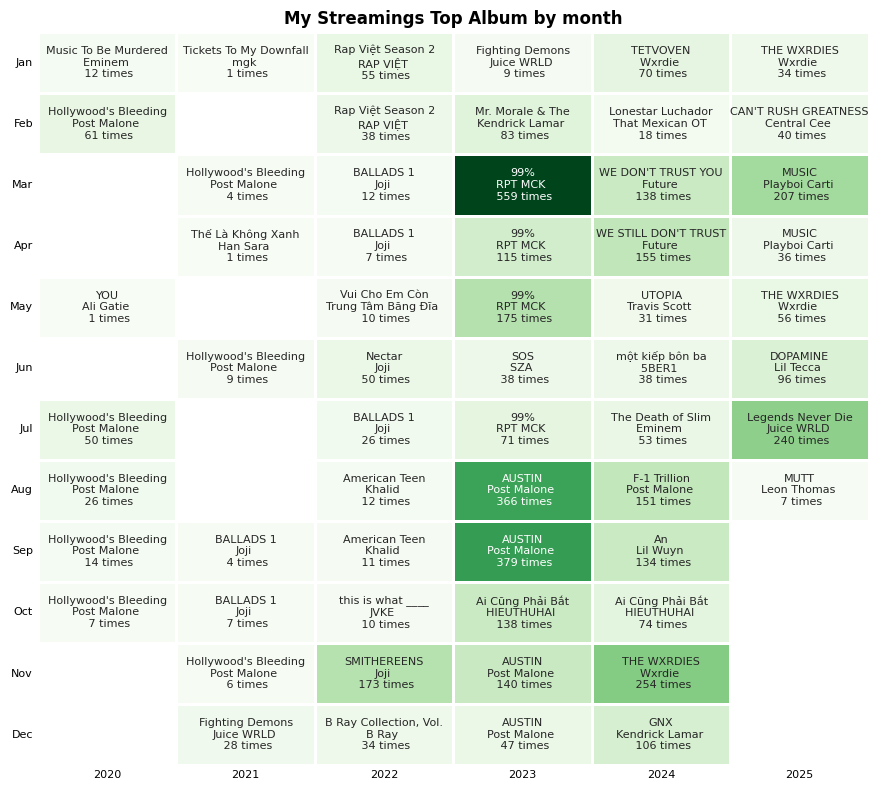

In [533]:
streaming_album_month = (
    streaming_df
    .groupby(["year", "month_number", "album", "artist"])
    .agg(count_track=("track_id", "count"))
    .reset_index()
)
streaming_album_month["album"] = streaming_album_month["album"].apply(shorten_text) + '\n' + streaming_album_month["artist"].apply(shorten_text)

streaming_top_album_month = (
    streaming_album_month
    .sort_values(["year", "month_number", "count_track"], ascending=[True, True, False])
    .drop_duplicates(subset=["year", "month_number"])
)
streaming_top_album_month_pivot = streaming_top_album_month.pivot(
    index="month_number",
    columns="year",
    values="album"
)
streaming_top_album_month_pivot_track = streaming_top_album_month.pivot(
    index="month_number",
    columns="year",
    values="count_track"
)

annot = (streaming_top_album_month_pivot.stack()
    .astype(str)
    .to_frame("album")
    .join(streaming_top_album_month_pivot_track.stack().to_frame("count_track"))
    .apply(lambda row: f"{row['album']} \n {row['count_track']:,.0f} times", axis=1)
    .unstack()
)

streaming_top_album_month_pivot_track.index = month_order
annot.index = month_order

plt.figure(figsize=(9,8))
sns.heatmap(streaming_top_album_month_pivot_track, annot=annot, fmt="", cmap="Greens", linewidths=1, cbar=False, mask=streaming_top_album_month_pivot_track.isna(), annot_kws={"fontsize":8})
plt.title("My Streamings Top Album by month", fontweight="bold")
plt.yticks(rotation=0, fontsize = 8)
plt.xticks(fontsize = 8)
plt.xlabel("")
plt.tick_params(axis='y', length=0)
plt.tick_params(axis='x', length=0)
plt.tight_layout()
plt.savefig("IV.10. MY STREAMINGs Top Album by month.png")
plt.show()

## **V.11. MY STREAMINGs by hour**

/var/folders/7q/sfnchm8d521c9vslcz802kw80000gn/T/ipykernel_21314/3069278474.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = streaming_hour_pivot.applymap(lambda x: f"{x:,.1f}" if x != 0 else "") + " hours"


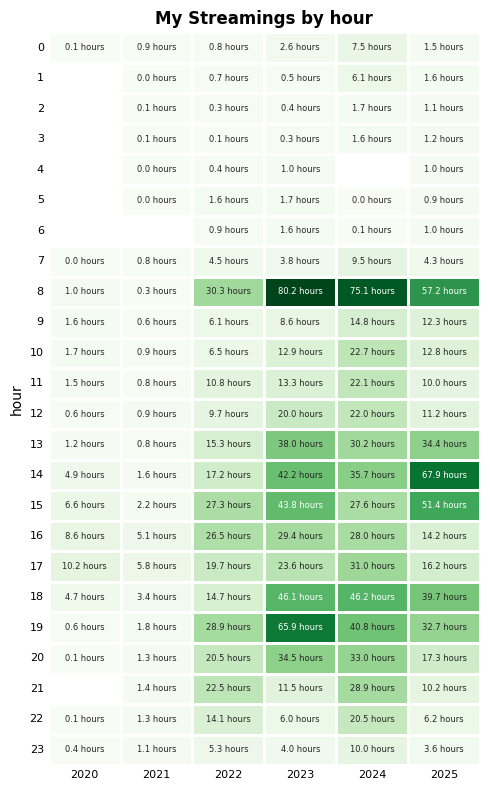

In [534]:
streaming_df["hour"] = streaming_df["datetime"].dt.hour

streaming_hour_pivot = streaming_df.pivot_table(
    index="hour",
    columns="year",
    values="hour_played",
    aggfunc="sum",
    fill_value=0
)

mask = streaming_hour_pivot == 0
annot = streaming_hour_pivot.applymap(lambda x: f"{x:,.1f}" if x != 0 else "") + " hours"

plt.figure(figsize=(5,8))
sns.heatmap(streaming_hour_pivot, annot=annot, fmt="s", cmap="Greens", linewidths=1, cbar=False, mask=mask, annot_kws={"fontsize":6})
plt.title("My Streamings by hour", fontweight="bold")
plt.yticks(rotation=0, fontsize = 8)
plt.xticks(fontsize = 8)
plt.xlabel("")
plt.tick_params(axis='y', length=0)
plt.tick_params(axis='x', length=0)
plt.tight_layout()
plt.savefig("IV.11. MY STREAMINGs by hour.png")
plt.show()

## **V.12. MY STREAMINGs over time**

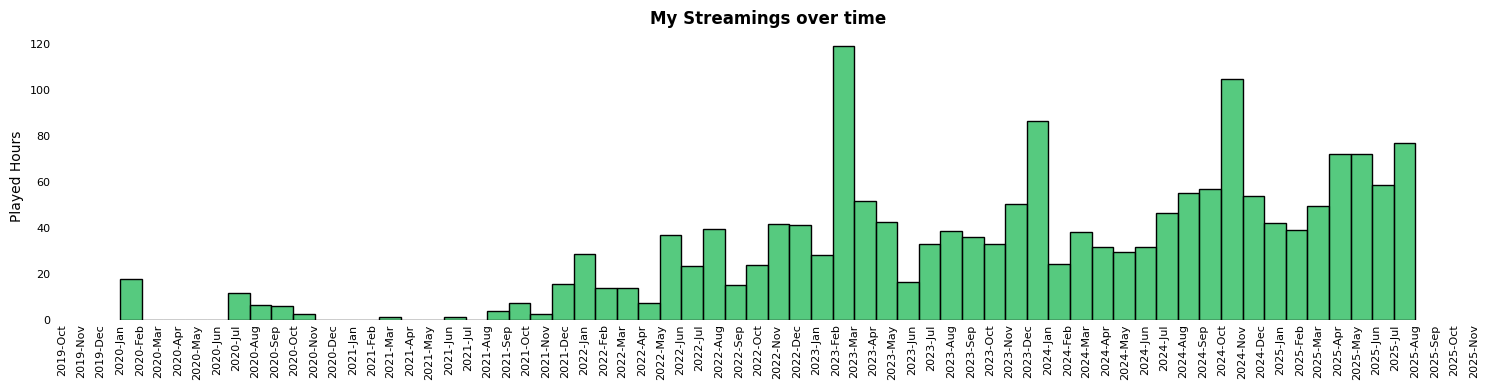

In [535]:
import matplotlib.dates as mdates

streaming_df["month2"] = streaming_df["datetime"].dt.to_period("M")
streaming_month_agg = streaming_df.groupby(["month2","year"], as_index=False)["hour_played"].sum()
streaming_month_agg["month2"] = streaming_month_agg["month2"].dt.to_timestamp()

plt.figure(figsize=(15,4))
sns.histplot(data=streaming_month_agg, x="month2", weights="hour_played", bins=60, color="#1db954")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%b"))
plt.title("My Streamings over time", fontweight="bold")
plt.yticks(rotation=0, fontsize=8)
plt.xticks(rotation=90, fontsize=8)
plt.xlabel("")
plt.ylabel("Played Hours")
plt.tick_params(axis='y', length=0)
plt.tick_params(axis='x', length=0)
sns.despine(bottom = True, left = True)

plt.tight_layout()
plt.savefig("IV.12. MY STREAMINGs over time.png")
plt.show()

---
# **THE END**

In [537]:
folder_path = "/Users/tainguyen/Desktop/Python/my-spotify-activity-2025-08-11/outputs/images"
markdown_lines = []

for filename in sorted(os.listdir(folder_path)):
    if filename.endswith(".png"):
        old_path = os.path.join(folder_path, filename)
        # Thay khoảng trắng bằng dấu gạch ngang
        new_filename = filename.replace(" ", "-")
        new_path = os.path.join(folder_path, new_filename)

        # Rename file
        os.rename(old_path, new_path)

        # Tạo dòng markdown
        markdown_lines.append(f"![](images/{new_filename})")

# Ghi ra file markdown
output_md = os.path.join(folder_path, "images.md")
with open(output_md, "w") as f:
    f.write("\n\n".join(markdown_lines))

print("✅ Done. Markdown saved to:", output_md)

✅ Done. Markdown saved to: /Users/tainguyen/Desktop/Python/my-spotify-activity-2025-08-11/outputs/images/images.md
